**본 ipynb 파일은 식별인원과 비식별인원의 행동 패턴을 분석하여, 유의미한 변수를 탐색하도록 합니다.**

# Library & Setting

In [3]:
# 전처리
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook as tq

# 그래프
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
sns.set_style('whitegrid')
path = 'DATA/font/NanumGothic-ExtraBold.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
female = sns.color_palette('Reds',5)
male =  sns.color_palette('Blues',5)
palette = {0:female[0], 5:male[0],
           1:female[1], 6:male[1],
           2:female[2], 7:male[2],
           3:female[3], 8:male[3],
           4:female[4], 9:male[4]}
%matplotlib inline

In [4]:
cks_dtype = {'clnt_id':'int64',
             'sess_id':'int64',
             'hit_seq':'int64',
             'action_type':'int64',
             'biz_unit':'category',
             'sess_dt':'object',
             'hit_tm':'object',
             'hit_pss_tm':'int64',
             'trans_id':'float64',
             'sech_kwd':'object',
             'tot_pag_view_ct':'float64',
             'tot_sess_hr_v':'float64',
             'trfc_src':'category',
             'dvc_ctg_nm':'category',
             'pd_c':'float64',
             'de_dt':'object',
             'de_tm':'object',
             'buy_am':'int64',
             'buy_ct':'int64',
             'clnt_gender':'category',
             'clnt_age':'float64'}

In [5]:
online = pd.read_csv('./DATA/온라인 행동 정보(CKS).csv', dtype=cks_dtype)
trade = pd.read_csv('./DATA/거래 정보(CKS).csv', dtype=cks_dtype)
customer = pd.read_csv('./DATA/고객 정보(CKS).csv', dtype=cks_dtype)
item = pd.read_csv('./DATA/상품분류 정보(CKS).csv', dtype=cks_dtype)

# Unknown vs Known
- 회원: 고객정보데이터 내 성별, 연령에 대한 정보가 있는 clnt_id
- 비회원: 회원이 아닌 clnt_id

In [7]:
gd_1 = online.loc[online['grade']==1,'clnt_id']
gd_2 = online.loc[online['grade']==2,'clnt_id']
gd_3 = online.loc[online['grade']==3,'clnt_id']
gd_4 = online.loc[online['grade']==4,'clnt_id']
gd_5 = online.loc[online['grade']==5,'clnt_id']
gd_6 = online.loc[online['grade']==6,'clnt_id']

grade_1 = online[online['clnt_id'].isin(gd_1)].reset_index(drop=True)
grade_2 = online[online['clnt_id'].isin(gd_2)].reset_index(drop=True)
grade_3 = online[online['clnt_id'].isin(gd_3)].reset_index(drop=True)
grade_4 = online[online['clnt_id'].isin(gd_4)].reset_index(drop=True)
grade_5 = online[online['clnt_id'].isin(gd_5)].reset_index(drop=True)
grade_6 = online[online['clnt_id'].isin(gd_6)].reset_index(drop=True)

## 페이지 뷰 수

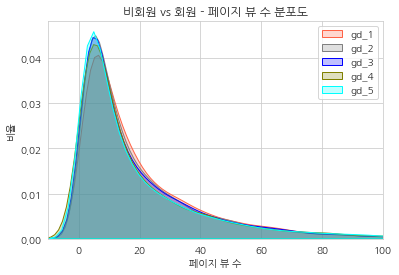

In [27]:
title = '비회원 vs 회원 - 페이지 뷰 수 분포도'
 
sns.kdeplot(grade_1[['clnt_id','sess_id','tot_pag_view_ct']].drop_duplicates()['tot_pag_view_ct'], shade=True, color='tomato')
sns.kdeplot(grade_2[['clnt_id','sess_id','tot_pag_view_ct']].drop_duplicates()['tot_pag_view_ct'], shade=True, color='gray')
sns.kdeplot(grade_3[['clnt_id','sess_id','tot_pag_view_ct']].drop_duplicates()['tot_pag_view_ct'], shade=True, color='blue')
sns.kdeplot(grade_4[['clnt_id','sess_id','tot_pag_view_ct']].drop_duplicates()['tot_pag_view_ct'], shade=True, color='olive')
sns.kdeplot(grade_5[['clnt_id','sess_id','tot_pag_view_ct']].drop_duplicates()['tot_pag_view_ct'], shade=True, color='cyan')
sns.kdeplot(grade_6[['clnt_id','sess_id','tot_pag_view_ct']].drop_duplicates()['tot_pag_view_ct'], shade=True, color='olive')
 
plt.legend(['gd_1','gd_2', 'gd_3','gd_4','gd_5', 'gd_6'])
plt.title(title)
plt.xlim(-10, 100)
plt.xlabel('페이지 뷰 수'); plt.ylabel('비율')
plt.savefig(f'./image/2.1.{title}.png', dpi=300)
plt.show()

## 총 세션 시간

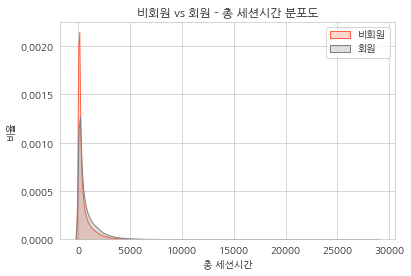

In [19]:
title = '비회원 vs 회원 - 총 세션시간 분포도'

sns.kdeplot(unknown[['clnt_id','sess_id','tot_sess_hr_v']].drop_duplicates()['tot_sess_hr_v'], shade=True, color='tomato')
sns.kdeplot(known[['clnt_id','sess_id','tot_sess_hr_v']].drop_duplicates()['tot_sess_hr_v'], shade=True, color='gray')

plt.legend(['비회원','회원'])
plt.title(title)
plt.xlabel('총 세션시간'); plt.ylabel('비율')
plt.savefig(f'./image/2.2.{title}.png', dpi=300)
plt.show()

## 행동 유형별 활동량

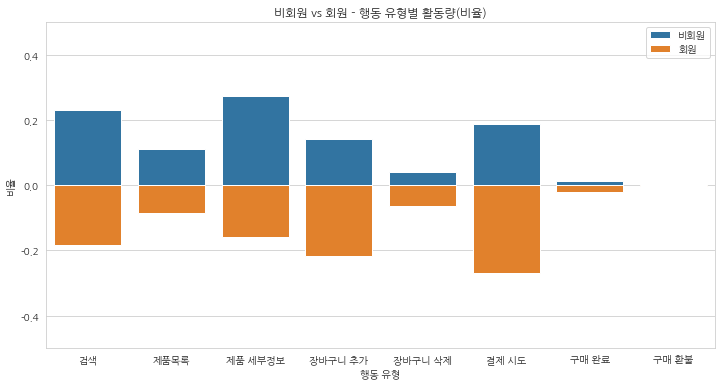

In [20]:
title = '비회원 vs 회원 - 행동 유형별 활동량(비율)'

plt.figure(figsize=(12,6))
part_a = unknown.groupby('action_type').size().to_frame('count').reset_index()
part_a['ratio'] = part_a['count']/part_a['count'].sum()

part_b = known.groupby('action_type').size().to_frame('count').reset_index()
part_b['ratio'] = part_b['count']/part_b['count'].sum()

part_a['from'] = '비회원'
part_b['from'] = '회원'; part_b['ratio'] = - part_b['ratio'] 
merge = pd.concat([part_a, part_b], axis=0)

sns.barplot(data=merge, x='action_type', y='ratio', hue='from', dodge=False)
plt.title(title)
plt.xlabel('행동 유형'); plt.ylabel('비율')
plt.legend(loc='upper right')
action_labels = ['검색','제품목록','제품 세부정보','장바구니 추가','장바구니 삭제','결제 시도','구매 완료','구매 환불']
plt.xticks(ticks=np.arange(8), labels = action_labels)
plt.ylim(-0.5, 0.5)

plt.savefig(f'./image/2.3.{title}.png', dpi=300)
plt.show()

## 날짜별 활동량

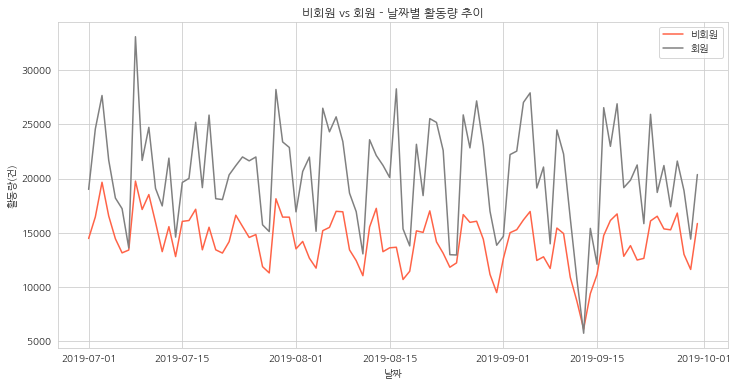

In [21]:
unknown_dt = unknown.copy()
known_dt = known.copy()

unknown_dt['sess_dt'] = pd.to_datetime(unknown['sess_dt'], format='%Y%m%d')
known_dt['sess_dt'] = pd.to_datetime(known['sess_dt'], format='%Y%m%d')

unknown_dt = unknown_dt.groupby('sess_dt').size().to_frame('count').reset_index()
known_dt = known_dt.groupby('sess_dt').size().to_frame('count').reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=unknown_dt, x='sess_dt', y='count', color='tomato')
sns.lineplot(data=known_dt, x='sess_dt', y='count', color='gray')

plt.title('비회원 vs 회원 - 날짜별 활동량 추이')
plt.xlabel('날짜'); plt.ylabel('활동량(건)')
plt.legend(['비회원','회원'])

plt.savefig(f'./image/2.4.{title}.png', dpi=300)
plt.show()

# Client Type

## 기존 고객 유형

온라인 행동 정보 데이터에 demographic 데이터를 바로 합칠 경우 시간이 너무 오래 걸립니다. 따라서 customer에서 미리 필터링하여 구분합니다.

In [22]:
print(customer['clnt_gender'].unique())
print(customer['clnt_age'].unique())

[NaN, 'F', 'M']
Categories (2, object): ['F', 'M']
[nan 30. 40. 20. 50. 60. 10.]


총 12개의 조합. 12개의 카테고리로 정의합니다.

|여성|구분|남성|구분|
|---|---|---|---|
|10, F|0|10, M|6|
|20, F|1|20, M|7|
|30, F|2|30, M|8|
|40, F|3|40, M|9|    
|50, F|4|50, M|10|  
|60, F|5|60, M|11|

In [23]:
def categorymaker(gender, age):
    if gender=='F':
        if age==10:
            x = 0
        elif age==20:
            x = 1
        elif age==30:
            x = 2
        elif age==40:
            x = 3
        elif age==50:
            x = 4
        else:
            x = 5
    else:
        if age==10:
            x = 6
        elif age==20:
            x = 7
        elif age==30:
            x = 8
        elif age==40:
            x = 9
        elif age==50:
            x = 10
        else:
            x = 11
    return(x)

In [24]:
id_known = customer[customer['clnt_gender'].notnull()].reset_index(drop=True)
id_known['clnt_type'] = id_known.apply(lambda x: categorymaker(x['clnt_gender'],x['clnt_age']), axis=1)
id_known.head()

,clnt_id,clnt_gender,clnt_age,clnt_type
0,2,F,30.0,2
1,9,F,40.0,3
2,12,F,40.0,3
3,20,F,30.0,2
4,22,M,30.0,8


In [25]:
known = online[online['clnt_id'].isin(id_known['clnt_id'])].reset_index(drop=True)
known = known.merge(id_known, how='left', on='clnt_id')
known.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,clnt_type
0,2,1,1,0,A03,20190728,23:35,39532,NaN,레쓰비,61.0,911.0,DIRECT,unknown,F,30.0,2
1,2,1,2,1,A03,20190728,23:35,47232,NaN,NaN,61.0,911.0,DIRECT,unknown,F,30.0,2
2,2,1,3,2,A03,20190728,23:35,48087,NaN,NaN,61.0,911.0,DIRECT,unknown,F,30.0,2
3,2,1,4,0,A03,20190728,23:35,62794,NaN,레쓰비,61.0,911.0,DIRECT,unknown,F,30.0,2
4,2,1,5,0,A03,20190728,23:36,104074,NaN,레쓰비,61.0,911.0,DIRECT,unknown,F,30.0,2


### 분포

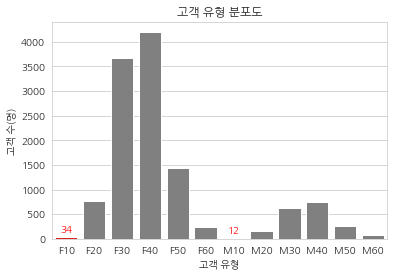

In [26]:
title = '고객 유형 분포도'

cnt = known[['clnt_id','clnt_type']].drop_duplicates().groupby('clnt_type').size().to_frame('count').reset_index()

teen_palette = {0:'red',1:'gray',2:'gray',3:'gray',4:'gray',5:'gray',
                6:'red',7:'gray',8:'gray',9:'gray',10:'gray',11:'gray'}

fig =  plt.figure()
sns.countplot(data=known[['clnt_id','clnt_type']].drop_duplicates(), x='clnt_type', palette=teen_palette)
plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('고객 수(명)')

plt.text(x=cnt['clnt_type'][0], y=cnt['count'][0]+100, s=f"{cnt['count'][0]}", horizontalalignment='center', color='red')
plt.text(x=cnt['clnt_type'][6], y=cnt['count'][6]+100, s=f"{cnt['count'][6]}", horizontalalignment='center', color='red')
         
type_labels=['F10','F20','F30','F40','F50','F60','M10','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(12), labels = type_labels)

plt.savefig(f'./image/3.1.1.{title}.png', dpi=300)
plt.show()

여성 회원이 남성에 비해 압도적으로 많습니다. 특히 30-40대에서 매우 높은 비율을 보입니다. 10대는 그래프에 보이지 않을 정도로 수가 매우 적습니다.

### 활동량

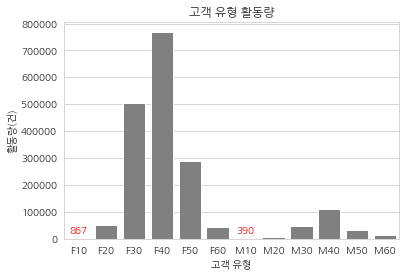

In [27]:
title = '고객 유형 활동량'

cnt = known.groupby('clnt_type').size().to_frame('count').reset_index()

teen_palette = {0:'red',1:'gray',2:'gray',3:'gray',4:'gray',5:'gray',
                6:'red',7:'gray',8:'gray',9:'gray',10:'gray',11:'gray'}

fig = plt.figure()
sns.countplot(data=known, x='clnt_type', palette=teen_palette)
plt.title(title)
plt.xlabel('고객 유형'); plt.ylabel('활동량(건)')

plt.text(x=cnt['clnt_type'][0], y=cnt['count'][0]+20000, s=f"{cnt['count'][0]}", horizontalalignment='center', color='red')
plt.text(x=cnt['clnt_type'][6], y=cnt['count'][6]+20000, s=f"{cnt['count'][6]}", horizontalalignment='center', color='red')

type_labels=['F10','F20','F30','F40','F50','F60','M10','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(12), labels = type_labels)

plt.savefig(f'./image/3.1.2.{title}.png', dpi=300)
plt.show()

활동량 역시 고객의 수에 비례하여 나타납니다. 30-40대 여성의 활동량이 가장 많습니다. 10대의 활동량은 역시 보이지 않을 정도로 적습니다.

### 10대 이상치

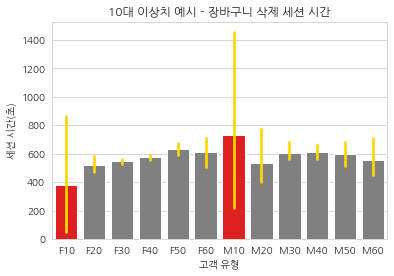

In [28]:
title = '10대 이상치 예시 - 장바구니 삭제 세션 시간'

outlier = known[known['action_type']==3].copy()
outlier['hit_pss_tm'] = outlier['hit_pss_tm']/1000
outlier = outlier.groupby(['clnt_id','clnt_type'])['hit_pss_tm'].mean().reset_index()

fig = plt.figure()
teen_palette = {0:'red',1:'gray',2:'gray',3:'gray',4:'gray',5:'gray',
                6:'red',7:'gray',8:'gray',9:'gray',10:'gray',11:'gray'}
sns.barplot(data=outlier, x='clnt_type', y='hit_pss_tm', estimator=np.median, errcolor='gold', palette=teen_palette)

plt.title(title); plt.xlabel('고객 유형'); plt.ylabel('세션 시간(초)')

type_labels=['F10','F20','F30','F40','F50','F60','M10','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(12), labels = type_labels)

plt.savefig(f'./image/3.1.3.{title}.png', dpi=300)
plt.show()

다음은 3번 장바구니 추가 활동의 세션 시간을 고객 유형별로 중앙값을 매긴 그래프입니다. 노란색 직선은 중앙값의 95% 신뢰구간입니다. 10대 여성, 남성의 신뢰구간이 매우 넓게 나타나고 있는데, 이는 분산이 매우 크다는 것을 의미합니다. 분산이 크면 평균 및 중앙값의 통계량이 대표성을 띠지 못하게 됩니다. **10대 수가 매우 적고, 분산이 크기 때문에 분석에 적합하지 않다고 판단하여 삭제하고 진행하도록 합니다.**

## 새로운 고객 유형

총 10개의 조합. 10의 카테고리로 재정의합니다.

|여성|구분|남성|구분|
|---|---|---|---|
|20, F|0|20, M|5|
|30, F|1|30, M|6|
|40, F|2|40, M|7|    
|50, F|3|50, M|8|  
|60, F|4|60, M|9|

In [29]:
def newcategorymaker(gender, age):
    if gender=='F':
        if age==20:
            x = 0
        elif age==30:
            x = 1
        elif age==40:
            x = 2
        elif age==50:
            x = 3
        elif age==60:
            x = 4
        else:
            x = np.NaN
    else:
        if age==20:
            x = 5
        elif age==30:
            x = 6
        elif age==40:
            x = 7
        elif age==50:
            x = 8
        elif age==60:
            x = 9
        else:
            x = np.NaN
    return x

In [30]:
id_known = customer[customer['clnt_gender'].notnull()].reset_index(drop=True)
id_known['clnt_type'] = id_known.apply(lambda x: newcategorymaker(x['clnt_gender'],x['clnt_age']), axis=1)
known = online[online['clnt_id'].isin(id_known['clnt_id'])].reset_index(drop=True)
known = known.merge(id_known, how='left', on='clnt_id')
known.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,clnt_type
0,2,1,1,0,A03,20190728,23:35,39532,NaN,레쓰비,61.0,911.0,DIRECT,unknown,F,30.0,1.0
1,2,1,2,1,A03,20190728,23:35,47232,NaN,NaN,61.0,911.0,DIRECT,unknown,F,30.0,1.0
2,2,1,3,2,A03,20190728,23:35,48087,NaN,NaN,61.0,911.0,DIRECT,unknown,F,30.0,1.0
3,2,1,4,0,A03,20190728,23:35,62794,NaN,레쓰비,61.0,911.0,DIRECT,unknown,F,30.0,1.0
4,2,1,5,0,A03,20190728,23:36,104074,NaN,레쓰비,61.0,911.0,DIRECT,unknown,F,30.0,1.0


### 분포

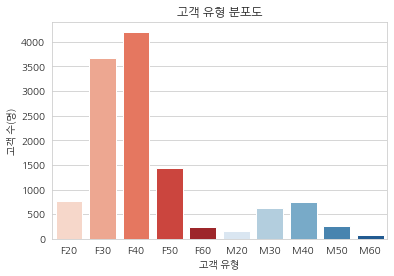

In [31]:
title = '고객 유형 분포도'

fig =  plt.figure()
sns.countplot(data=known[['clnt_id','clnt_type']].drop_duplicates(), x='clnt_type', palette=palette)
plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('고객 수(명)')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/3.2.1.{title}.png', dpi=300)
plt.show()

### 활동량

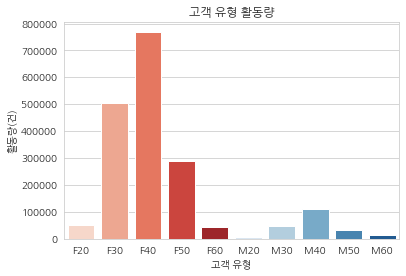

In [32]:
title = '고객 유형 활동량'

fig = plt.figure()
sns.countplot(data=known, x='clnt_type', palette=palette)
plt.title(title)
plt.xlabel('고객 유형'); plt.ylabel('활동량(건)')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/3.2.2.{title}.png', dpi=300)
plt.show()

30-40대가 가장 높은 비율을 보이며, 활동량도 그에 비례합니다.

# EDA

## 행동 유형별 활동량

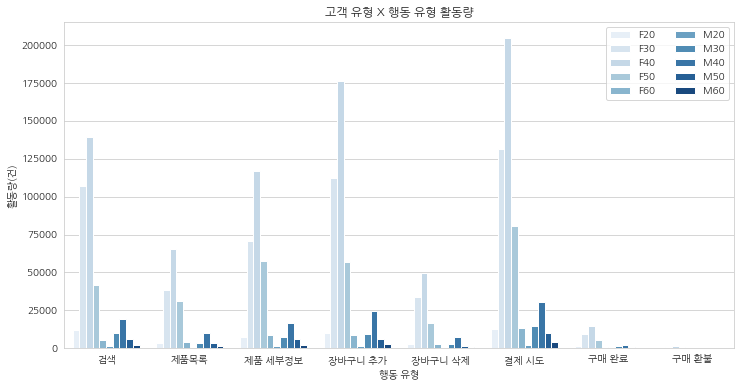

In [33]:
title = '고객 유형 X 행동 유형 활동량'

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=known, x='action_type', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('행동 유형'); plt.ylabel('활동량(건)')

action_labels = ['검색','제품목록','제품 세부정보','장바구니 추가','장바구니 삭제','결제 시도','구매 완료','구매 환불']
plt.xticks(ticks=np.arange(8), labels = action_labels)

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

plt.savefig(f'./image/4.1.{title}.png', dpi=300)
plt.show()

각 행동 유형에서의 활동량에 차이가 있지만, 30-40대의 활동량이 가장 뚜렷한 건 변함 없습니다.

### 예시) 검색

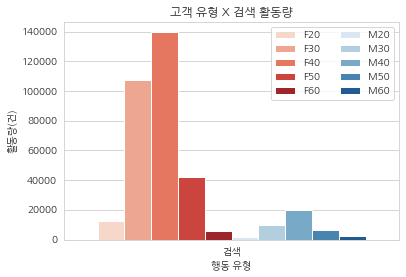

In [34]:
title = '고객 유형 X 검색 활동량'

piece = known[known['action_type']==0]

fig, ax = plt.subplots()
sns.countplot(data=piece, x='action_type', hue='clnt_type', palette=palette)
plt.title(title)
plt.xlabel('행동 유형'); plt.ylabel('활동량(건)')

action_labels = ['검색']
plt.xticks(ticks=np.arange(1), labels = action_labels)

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

plt.savefig(f'./image/4.1.1.{title}.png', dpi=300)
plt.show()

## 행동 유형별 도달 시간

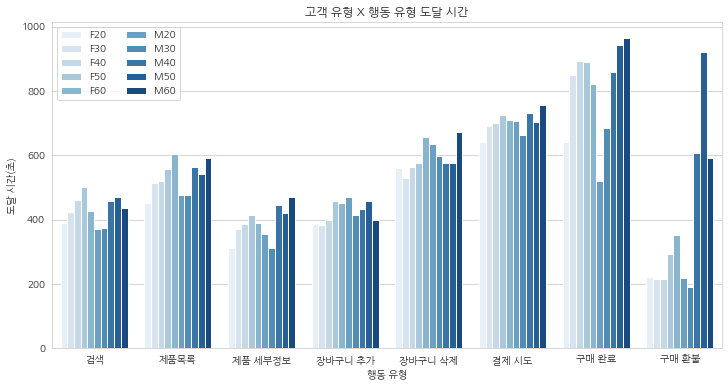

In [35]:
title = '고객 유형 X 행동 유형 도달 시간'

known['hit_pss_tm'] = known['hit_pss_tm']/1000 # 밀리 초 => 초 변환
piece = known.groupby(['clnt_type','action_type'])['hit_pss_tm'].median().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=piece, x='action_type', y='hit_pss_tm', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('행동 유형'); plt.ylabel('도달 시간(초)')

action_labels = ['검색','제품목록','제품 세부정보','장바구니 추가','장바구니 삭제','결제 시도','구매 완료','구매 환불']
plt.xticks(ticks=np.arange(8), labels = action_labels)

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper left', ncol=2)

plt.savefig(f'./image/4.2.{title}.png', dpi=300)
plt.show()

행동 유형별 세션 시간을 중앙값을 기준으로 살펴본 결과, 회원 유형별로 각  행동 유형까지 도달하는 시간이 각각 다르게 나타남을 확인할 수 있습니다.

## 총 세션 시간

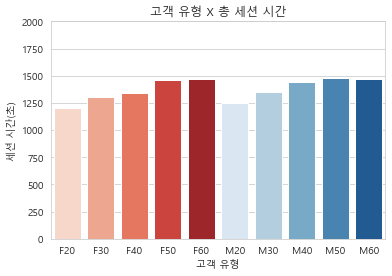

In [23]:
title = '고객 유형 X 총 세션 시간'

piece = known.groupby('clnt_type')['tot_sess_hr_v'].median().to_frame().reset_index()

fig = plt.figure()
sns.barplot(data=piece, x='clnt_type', y='tot_sess_hr_v', palette=palette)
plt.title(title)
plt.xlabel('고객 유형'); plt.ylabel('세션 시간(초)');plt.ylim(0,2000)

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/4.3.{title}.png', dpi=300)
plt.show()

한 세션에 머무르는 시간의 중앙값을 살펴본 결과, 연령대가 높아질수록 시간이 증가함을 확인할 수 있습니다. 분류 모델링 시 변수로 사용할 만한 가치가 있습니다. 다만, 한 세션이 언제 끝나는 지 모르기 때문에 동일한 고객이 접속하는 경우 과거의 측정량을 사용해야 합니다.

## 페이지 뷰 수

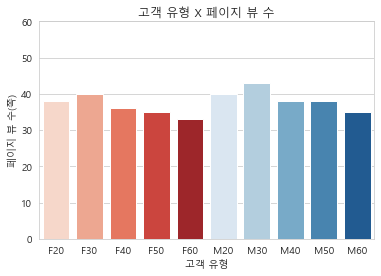

In [24]:
title = '고객 유형 X 페이지 뷰 수'

piece = known.groupby('clnt_type')['tot_pag_view_ct'].median().to_frame().reset_index()

fig = plt.figure()
sns.barplot(data=piece, x='clnt_type', y='tot_pag_view_ct', palette=palette)
plt.title(title)
plt.xlabel('고객 유형'); plt.ylabel('페이지 뷰 수(쪽)'); plt.ylim(0,60)

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/4.4.{title}.png', dpi=300)
plt.show()

한 세션에서 살펴보는 페이지 뷰 수의 중앙값을 살펴본 결과 10~30대의 뷰 수는 높은 반면, 연령대가 높아질수록 적어지는 것을 확인할 수 있습니다. 분류 모델링 시 변수로 사용할 만한 가치가 있습니다. 다만, 한 세션이 언제 끝나는 지 모르기 때문에 동일한 고객이 접속하는 경우 과거의 측정량을 변수로 사용해야 합니다.

## 페이지 서핑 속도

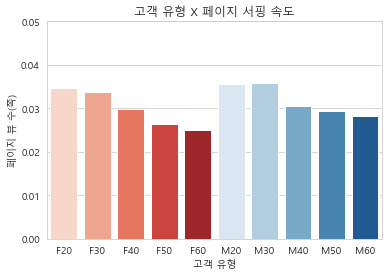

In [25]:
title = '고객 유형 X 페이지 서핑 속도'

known['pv_hr'] =  known['tot_pag_view_ct']/known['tot_sess_hr_v']

piece = known.groupby('clnt_type')['pv_hr'].median().to_frame().reset_index()

fig = plt.figure()
sns.barplot(data=piece, x='clnt_type', y='pv_hr', palette=palette)
plt.title(title)
plt.xlabel('고객 유형'); plt.ylabel('페이지 뷰 수(쪽)'); plt.ylim(0,0.05)

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/4.5.{title}.png', dpi=300)
plt.show()

시간 단위별로 페이지 뷰 수가 많다는 건 짧은 주기로 페이지를 넘겼다는 의미입니다. 여성은 연령대가 높아질수록 줄어드는 경향을 보이며 남성은 30대까지는 증가, 그 이후로는 감소하는 경향을 보입니다. 이 특징은 연령을 암시하는 주요 변수로 사용될 수 있습니다.

## 유입 채널

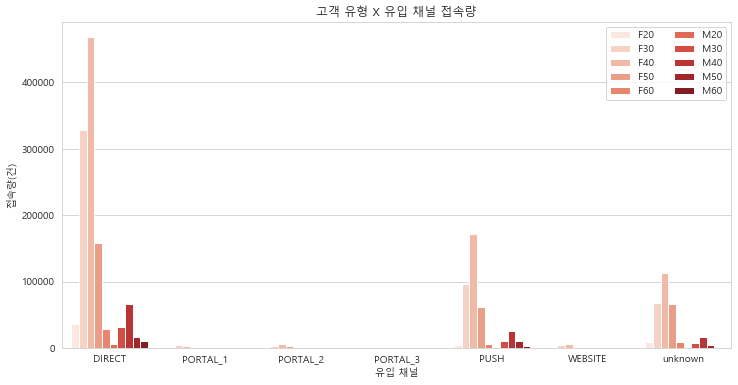

In [26]:
title = '고객 유형 X 유입 채널 접속량'

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=known, x='trfc_src', hue='clnt_type', palette=sns.color_palette("Reds",10))
plt.title(title)
plt.xlabel('유입 채널'); plt.ylabel('접속량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

plt.savefig(f'./image/4.6.{title}.png', dpi=300)
plt.show()

모든 채널에서 동일하게 30-40대 여성이 많습니다. 남성 중에서는 40대가 가장 많습니다.

## 기기 유형

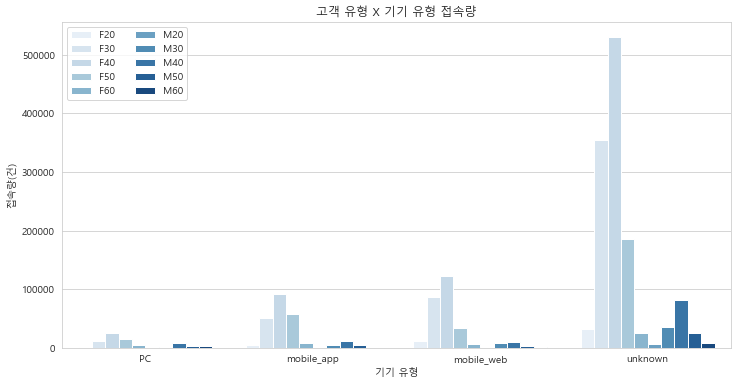

In [27]:
title = '고객 유형 X 기기 유형 접속량'

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=known, x='dvc_ctg_nm', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('기기 유형'); plt.ylabel('접속량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper left', ncol=2)

plt.savefig(f'./image/4.7.{title}.png', dpi=300)
plt.show()

모든 채널에서 동일하게 30-40대 여성이 많습니다. 남성 중에서는 40대가 가장 많습니다.

## 날짜

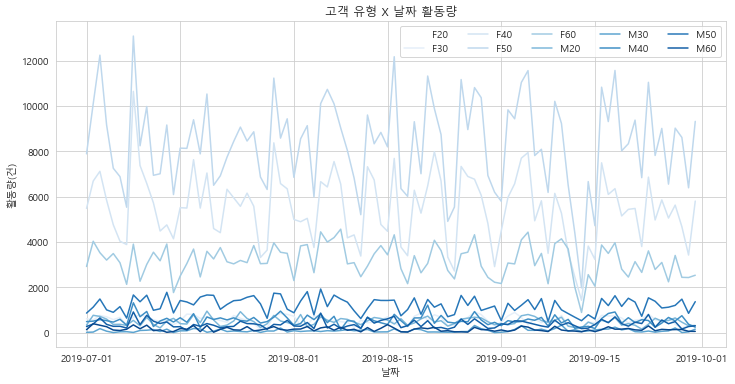

In [28]:
title = '고객 유형 X 날짜 활동량'

known_dt = known.copy()
known_dt['sess_dt'] = pd.to_datetime(known_dt['sess_dt'], format='%Y%m%d')
part_date = known_dt.groupby(['sess_dt','clnt_type']).size().to_frame('count').reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=part_date, x='sess_dt', y='count', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('날짜'); plt.ylabel('활동량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=5)

plt.savefig(f'./image/4.8.{title}.png', dpi=300)
plt.show()

추석 부근에서 활동량이 급감하는 특이점을 제외하고는 날짜라는 변수가 주는 의미는 커보이지 않습니다. 오히려 고객 유형별로 특정한 패턴을 보이는 것으로 보아, 요일 주기로 나누어 볼 필요가 있습니다. 

## 요일

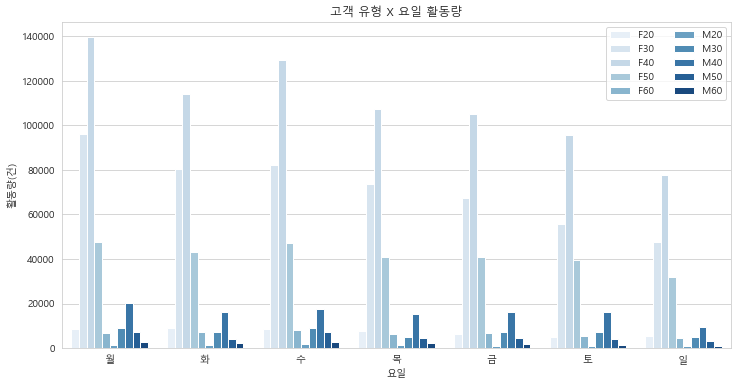

In [29]:
title = '고객 유형 X 요일 활동량'

known_dt['weekday'] = known_dt['sess_dt'].apply(lambda x: x.weekday())

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=known_dt, x='weekday', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('요일'); plt.ylabel('활동량(건)')

week_label=['월','화','수','목','금','토','일']
plt.xticks(ticks=np.arange(7), labels = week_label)

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

plt.savefig(f'./image/4.9.{title}.png', dpi=300)
plt.show()

전체적으로 주말에 가까워질 수록 활동량이 감소하는 것으로 보입니다. 30-40대 여성의 활동량이 매우 높게 나타납니다.

## 시간대

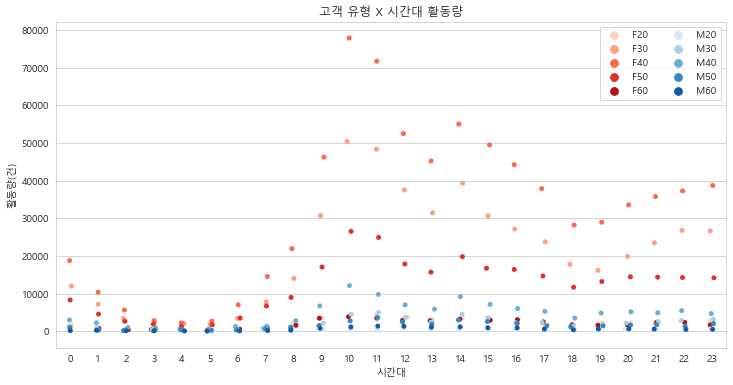

In [30]:
title = '고객 유형 X 시간대 활동량'

known_dt['hour'] = pd.to_datetime(known_dt['hit_tm']).apply(lambda x: x.hour)
part_hour = known_dt.groupby(['hour','clnt_type']).size().to_frame('count').reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.stripplot(data=part_hour, x='hour', y='count', hue='clnt_type', palette=palette)
plt.title(title)
plt.xlabel('시간대'); plt.ylabel('활동량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

plt.savefig(f'./image/4.10.{title}.png', dpi=300)
plt.show()

고객 유형별로 시간대에 따라 접속량이 다른 것을 확인할 수 있습니다. 주로, 오전 10시와 오후 14시경에 활동량이 폭발적으로 증가하며, 새벽 시간에 저조한 활동량을 보입니다.

# EDA on Per Session

In [31]:
type_id = known[['clnt_id','clnt_type']].drop_duplicates().reset_index(drop=True)

## 세션 활동량

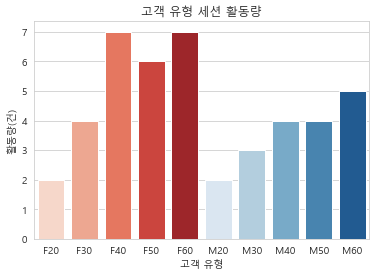

In [32]:
title = '고객 유형 세션 활동량'

part_01 = known.groupby('clnt_id')['sess_id'].nunique().to_frame('count').reset_index()
part_01 = part_01.merge(type_id, how='left', on='clnt_id')
piece = part_01.groupby('clnt_type')['count'].median().to_frame().reset_index()

fig = plt.figure()
sns.barplot(data=piece, x='clnt_type', y='count', palette=palette)
plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('활동량(건)')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/5.1.{title}.png', dpi=300)
plt.show()

여성의 세션 빈도가 전반적으로 높게 나타납니다. 연령대가 높아질 수록 세션이 한 명당 세션이 많은 것으로 나타났습니다.

## 세션 당 활동량

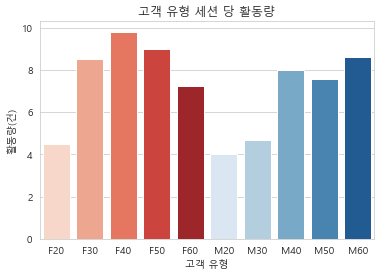

In [33]:
title = '고객 유형 세션 당 활동량'

part_02 = known.groupby('clnt_id')['sess_id'].apply(lambda x: x.count()/x.nunique()).to_frame('count').reset_index()
part_02 = part_02.merge(type_id, how='left', on='clnt_id')
piece = part_02.groupby('clnt_type')['count'].median().to_frame().reset_index()

fig = plt.figure()
sns.barplot(data=piece, x='clnt_type', y='count', palette=palette)
plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('활동량(건)')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/5.2.{title}.png', dpi=300)
plt.show()

전체적으로 연령대가 높아질수록 활동량이 많아집니다.여성의 활동량이 높은 편이며, 10-20대의 활동량이 남녀에서 가장 낮게 나타납니다. 예외로는 10대 남성의 활동량이 두드러집니다.

## 세션 당 행동 유형별 활동량

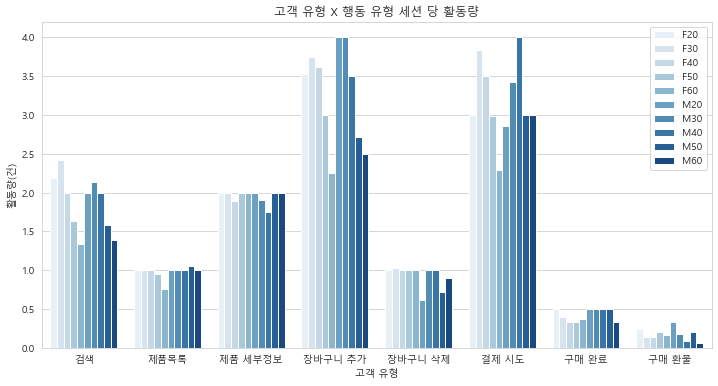

In [34]:
title = '고객 유형 X 행동 유형 세션 당 활동량'

part_03_1 = known.groupby('clnt_id')['sess_id'].nunique().to_frame('sess_count').reset_index()
part_03_2 = known.groupby(['clnt_id','action_type'])['sess_id'].count().to_frame('action_count').reset_index()
part_03_2 = part_03_2.merge(part_03_1, how='left', on='clnt_id')
part_03_2['count'] = part_03_2['action_count']/part_03_2['sess_count']
part_03 = part_03_2.merge(type_id,how='left',on='clnt_id')
piece = part_03.groupby(['action_type','clnt_type'])['count'].median().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=piece, x='action_type', y='count', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('활동량(건)')

action_labels = ['검색','제품목록','제품 세부정보','장바구니 추가','장바구니 삭제','결제 시도','구매 완료','구매 환불']
plt.xticks(ticks=np.arange(8), labels = action_labels)

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right')

plt.savefig(f'./image/5.3.{title}.png', dpi=300)
plt.show()

## 세션 당 행동 유형별 도달 시간

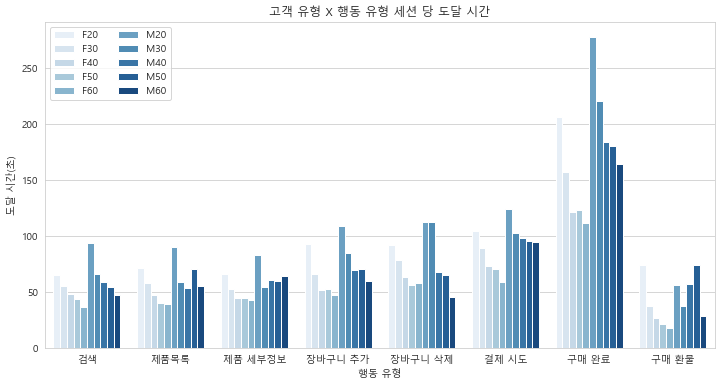

In [35]:
title = '고객 유형 X 행동 유형 세션 당 도달 시간'

part_04_1 = known.groupby('clnt_id')['sess_id'].nunique().to_frame('sess_count').reset_index()
part_04_2 = known.groupby(['clnt_id','action_type'])['hit_pss_tm'].mean().to_frame('action_time').reset_index()
part_04_2 = part_04_2.merge(part_04_1, how='left', on='clnt_id')
part_04_2['sess_time'] = part_04_2['action_time']/part_04_2['sess_count']
part_04 = part_04_2.merge(type_id,how='left',on='clnt_id')
piece = part_04.groupby(['action_type','clnt_type'])['sess_time'].median().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=piece, x='action_type', y='sess_time', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('행동 유형');plt.ylabel('도달 시간(초)')

action_labels = ['검색','제품목록','제품 세부정보','장바구니 추가','장바구니 삭제','결제 시도','구매 완료','구매 환불']
plt.xticks(ticks=np.arange(8), labels = action_labels)

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper left', ncol=2)

plt.savefig(f'./image/5.4.{title}.png', dpi=300)
plt.show()

## 세션 당 활동 시간

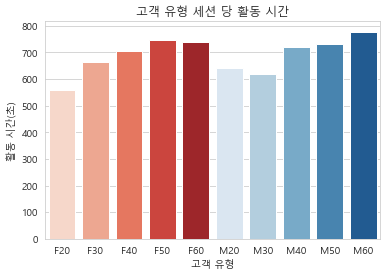

In [36]:
title = '고객 유형 세션 당 활동 시간'

part_05_1 = known.groupby('clnt_id')['sess_id'].nunique().to_frame('sess_count').reset_index()
part_05_2 = known.groupby(['clnt_id','sess_id'])['tot_sess_hr_v'].mean().to_frame('sess_time').reset_index()
part_05_2 = part_05_2.merge(part_05_1, how='left', on='clnt_id')
part_05 = (part_05_2.
           groupby(['clnt_id'])['sess_time','sess_count'].
           apply(lambda x: x['sess_time'].sum()/x['sess_count'].mean()).
           to_frame('sess_time').
           reset_index())
part_05 = part_05.merge(type_id,how='left',on='clnt_id')
piece = part_05.groupby('clnt_type')['sess_time'].median().to_frame().reset_index()

fig = plt.figure()
sns.barplot(data=piece, x='clnt_type', y='sess_time', palette=palette)
plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('활동 시간(초)')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/5.5.{title}.png', dpi=300)
plt.show()

세션 당 활동 시간은 연령대가 높아질수록 증가하는 경향을 보인다. 다만 30대 남성에서는 감소하는 경향을 보인다.

## 세션 당 총 페이지 뷰 수

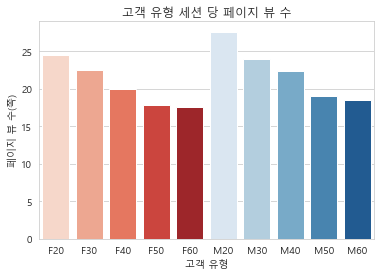

In [37]:
title = '고객 유형 세션 당 페이지 뷰 수'

part_06_1 = known.groupby('clnt_id')['sess_id'].nunique().to_frame('sess_count').reset_index()
part_06_2 = known.groupby(['clnt_id','sess_id'])['tot_pag_view_ct'].mean().to_frame('pag_view').reset_index()
part_06_2 = part_06_2.merge(part_06_1, how='left', on='clnt_id')
part_06 = (part_06_2.
           groupby(['clnt_id'])['pag_view','sess_count'].
           apply(lambda x: x['pag_view'].sum()/x['sess_count'].mean()).
           to_frame('pag_view').
           reset_index())
part_06 = part_06.merge(type_id,how='left',on='clnt_id')
piece = part_06.groupby('clnt_type')['pag_view'].median().to_frame().reset_index()

fig = plt.figure()
sns.barplot(data=piece, x='clnt_type', y='pag_view', palette=palette)
plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('페이지 뷰 수(쪽)')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/5.6.{title}.png', dpi=300)
plt.show()

세션 당 총 페이지 뷰 수는 연령대가 높아질수록 감소하는 경향을 보인다.

## 세션 당 페이지 서핑 속도

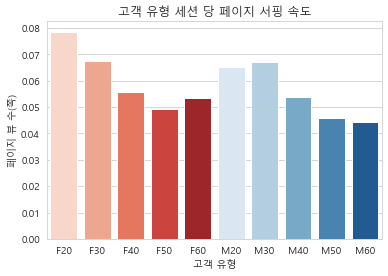

In [38]:
title = '고객 유형 세션 당 페이지 서핑 속도'

part_07_1 = known.groupby('clnt_id')['sess_id'].nunique().to_frame('sess_count').reset_index()
part_07_2 = known.groupby(['clnt_id','sess_id'])['pv_hr'].mean().to_frame('pv_ss').reset_index()
part_07_2 = part_07_2.merge(part_07_1, how='left', on='clnt_id')
part_07 = (part_07_2.
           groupby(['clnt_id'])['pv_ss','sess_count'].
           apply(lambda x: x['pv_ss'].sum()/x['sess_count'].mean()).
           to_frame('pv_hr').
           reset_index())
part_07 = part_07.merge(type_id,how='left',on='clnt_id')
piece = part_07.groupby('clnt_type')['pv_hr'].median().to_frame().reset_index()

fig = plt.figure()
sns.barplot(data=piece, x='clnt_type', y='pv_hr', palette=palette)
plt.title(title)
plt.xlabel('고객 유형');plt.ylabel('페이지 뷰 수(쪽)')

type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
plt.xticks(ticks=np.arange(10), labels = type_labels)

plt.savefig(f'./image/5.7.{title}.png', dpi=300)
plt.show()

세션 당 시간 단위별 페이지 뷰 수는 연령대가 높아질수록 감소하는 경향을 보인다. 다만 30대 남성에서는 증가하는 경향을 보인다.

## 세션 당 유입 채널

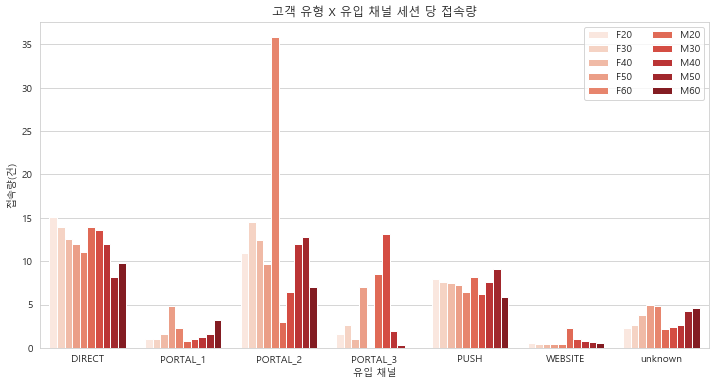

In [39]:
title = '고객 유형 X 유입 채널 세션 당 접속량'

part_08_1 = known.groupby('clnt_id')['sess_id'].nunique().to_frame('sess_count').reset_index()
part_08_2 = known.groupby(['clnt_id','trfc_src'])['sess_id'].count().to_frame('src_count').reset_index()
part_08_2 = part_08_2.merge(part_08_1, how='left', on='clnt_id')
part_08_2['count'] = part_08_2['src_count']/part_08_2['sess_count']
part_08 = part_08_2.merge(type_id,how='left',on='clnt_id')
piece = part_08.groupby(['clnt_type','trfc_src'])['count'].median().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=piece, x='trfc_src', y='count', hue='clnt_type', palette=sns.color_palette("Reds",10))
plt.title(title)
plt.xlabel('유입 채널');plt.ylabel('접속량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

plt.savefig(f'./image/5.8.{title}.png', dpi=300)
plt.show()

DIRECT는 연령대가 높아질수록 접속량이 감소, unknown은 증가할수록 접속량이 비례하는 것으로 보입니다.

## 세션 당 기기 유형

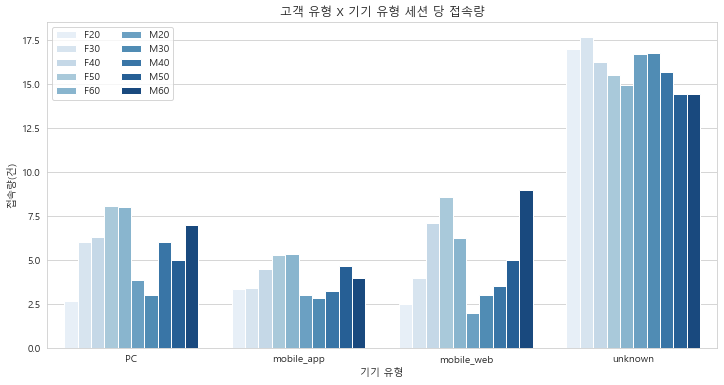

In [40]:
title = '고객 유형 X 기기 유형 세션 당 접속량'

part_09_1 = known.groupby('clnt_id')['sess_id'].nunique().to_frame('sess_count').reset_index()
part_09_2 = known.groupby(['clnt_id','dvc_ctg_nm'])['sess_id'].count().to_frame('dvc_count').reset_index()
part_09_2 = part_09_2.merge(part_09_1, how='left', on='clnt_id')
part_09_2['count'] = part_09_2['dvc_count']/part_09_2['sess_count']
part_09 = part_09_2.merge(type_id,how='left',on='clnt_id')
piece = part_09.groupby(['dvc_ctg_nm','clnt_type'])['count'].median().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=piece, x='dvc_ctg_nm', y='count', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('기기 유형');plt.ylabel('접속량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper left', ncol=2)

plt.savefig(f'./image/5.9.{title}.png', dpi=300)
plt.show()

mobile은 분포의 안정을 보이며, 연령대가 높아질수록 접속량이 증가하는 경향을 보입니다.

## 세션 당 요일

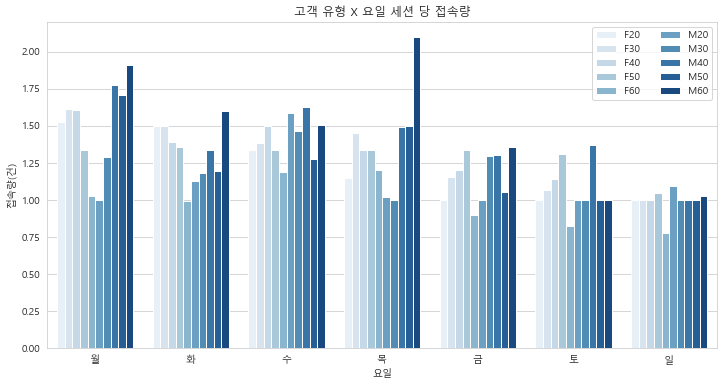

In [41]:
title = '고객 유형 X 요일 세션 당 접속량'

part_10_1 = known_dt.groupby('clnt_id')['sess_id'].nunique().to_frame('sess_count').reset_index()
part_10_2 = known_dt.groupby(['clnt_id','weekday'])['sess_id'].count().to_frame('week_count').reset_index()
part_10_2 = part_10_2.merge(part_10_1, how='left', on='clnt_id')
part_10_2['count'] = part_10_2['week_count']/part_10_2['sess_count']
part_10 = part_10_2.merge(type_id,how='left',on='clnt_id')
piece = part_10.groupby(['weekday','clnt_type'])['count'].median().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=piece, x='weekday', y='count', hue='clnt_type', palette=sns.color_palette("Blues",10))
plt.title(title)
plt.xlabel('요일');plt.ylabel('접속량(건)')

week_label=['월','화','수','목','금','토','일']
plt.xticks(ticks=np.arange(7), labels = week_label)

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

plt.savefig(f'./image/5.10.{title}.png', dpi=300)
plt.show()

요일별로 접속량의 차이가 생기는 것으로 보입니다.

## 세션 당 시간대

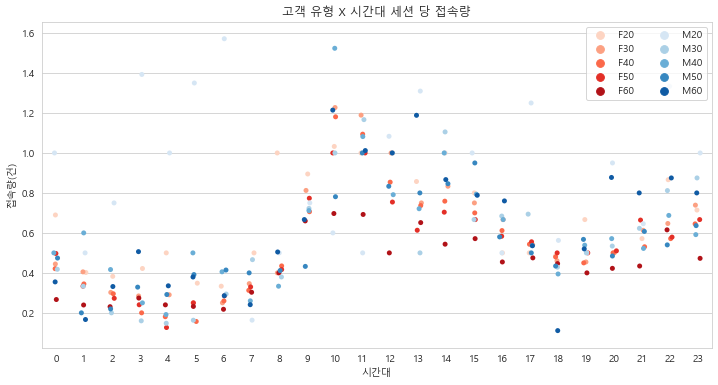

In [42]:
title = '고객 유형 X 시간대 세션 당 접속량'

part_11_1 = known_dt.groupby('clnt_id')['sess_id'].nunique().to_frame('sess_count').reset_index()
part_11_2 = known_dt.groupby(['clnt_id','hour'])['sess_id'].count().to_frame('hour_count').reset_index()
part_11_2 = part_11_2.merge(part_11_1, how='left', on='clnt_id')
part_11_2['count'] = part_11_2['hour_count']/part_11_2['sess_count']
part_11 = part_11_2.merge(type_id,how='left',on='clnt_id')
piece = part_11.groupby(['clnt_type','hour'])['count'].median().to_frame().reset_index()

fig, ax = plt.subplots(figsize=(12,6))
sns.stripplot(data=piece, x='hour', y='count', hue='clnt_type', palette=palette)
plt.title(title)
plt.xlabel('시간대');plt.ylabel('접속량(건)')

handles, labels = ax.get_legend_handles_labels()
type_labels=['F20','F30','F40','F50','F60','M20','M30','M40','M50','M60']
ax.legend(handles, type_labels, loc='upper right', ncol=2)

plt.savefig(f'./image/5.11.{title}.png', dpi=300)
plt.show()

시간대별로 연령별 접속량이 다른 추이로 나타납니다. 좋은 변수로 보입니다.